# Fruit Recognition System

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
from random import seed
from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import Dataset

We have two folders for Training and Testing of Fruits containing 15 different fruits.

In [3]:
Data_Train = "F:\Training"
Data_Test = "F:\Testing"

# Load Dataset

In [4]:
def load_dataset(fruit_name, data_type):
    label=[]
    data = []
    
    if data_type=='Training':
        strr = "F:/Training/"+fruit_name+ "/*"
        for file_ in glob.glob(strr):
            img = cv2.imread(file_)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            label.append(fruit_name)
            
    elif data_type=='Testing':
        strr = "F:/Testing/"+fruit_name+ "/*"
        for file_ in glob.glob(strr):
            img = cv2.imread(file_)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            label.append(fruit_name)
    return data,label


# Train Dataset

In [5]:
def train_data(data_type):
    apple_data, apple_label = load_dataset('Apple', data_type)
    banana_data, banana_label = load_dataset('Banana', data_type)
    guava_data, guava_label = load_dataset('Guava', data_type)
    kiwi_data, kiwi_label = load_dataset('Kiwi', data_type)
    lychee_data, lychee_label = load_dataset('Lychee', data_type)
    mango_data, mango_label = load_dataset('Mango', data_type)
    orange_data, orange_label = load_dataset('Orange', data_type)
    papaya_data, papaya_label = load_dataset('Papaya', data_type)
    peach_data, peach_label = load_dataset('Peach', data_type)
    pear_data, pear_label = load_dataset('Pear', data_type)
    pineapple_data, pineapple_label = load_dataset('Pineapple', data_type)
    plum_data, plum_label = load_dataset('Plum', data_type)
    pomegranate_data, pomegranate_label = load_dataset('Pomegranate', data_type)
    strawberry_data, strawberry_label = load_dataset('Strawberry', data_type)
    data =np.concatenate((apple_data, banana_data, guava_data, kiwi_data, lychee_data, mango_data, orange_data, papaya_data, peach_data, pear_data, pineapple_data, pomegranate_data,strawberry_data))
    label =np.concatenate((apple_label, banana_label, guava_label, kiwi_label, lychee_label, mango_label, orange_label, papaya_label, peach_label, pear_label, pineapple_label, pomegranate_label,strawberry_label))
    return data, label

In [6]:
trained_data, trained_labels = train_data('Training')
tested_data, tested_labels = train_data('Testing')
print(trained_data.shape, trained_labels.shape)

(6347, 100, 100, 3) (6347,)


# Preprocessing Part 1

In [7]:
def preprocessing_part1(data):
    prep_data=[]
    for i in range(data.shape[0]):
        img=cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (72, 72), anti_aliasing=True)
        prep_data.append(img)
    return prep_data

In [8]:
preprocessed_data_train = preprocessing_part1(trained_data)
preprocessed_data_test = preprocessing_part1(tested_data)

# Preprocessing Part 2

In [9]:
def Extract_Histogram(img):
    hist,_= hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    return hist
  
def preprocessing_part2(data):
    data_features=[]
    for val in range(np.shape(data)[0]):
        data_features.append(Extract_Histogram(data[val])) 
    return data_features

In [10]:
preprocessed_data_train = preprocessing_part2(preprocessed_data_train)
preprocessed_data_test= preprocessing_part2(preprocessed_data_test)

# KNN Classification

In [11]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=9)
knn_clf.fit(preprocessed_data_train, trained_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [12]:
y_knn_pred = knn_clf.predict(preprocessed_data_test)

# Accuracy

In [13]:
print(accuracy_score(tested_labels, y_knn_pred)*100,'%')

92.47355573637104 %


In [14]:
def show_results(img, name):
    plt.axis("off")
    plt.title(name)
    plt.imshow(img)
    plt.show()

# Result

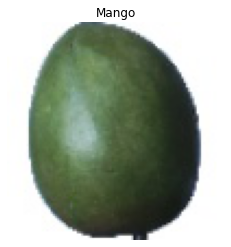

In [15]:
x_ = randint(0, tested_data.shape[0])
show_results(tested_data[x_], y_knn_pred[x_])